#Tutorial 9: Video Editing I

Name: Lu Fan

Email: cslfan@comp.polyu.edu.hk

Room: WFH


# Video Editing Part I
In this tutorial, we begin to learn how to edit videos in python, via MoviePy library. Usually, we edit videos by commercial software, such as Premiere Pro and iMovie, but there are still situations in which editing videos by programming is preferred. For example,



1.   The effect you want is too complicated and beyond the ability of video editing software.
2.   You have lots of video (e.g. hundreds) to process in the same way, and you want to automatize the editing.
3.   You are the developer of video editing software.
4.   Commercial software is usually expensive, and you want to save money.

This week, we learn how to edit a single video via MoviePy.

### Table of content
1.   Install MoviePy
2.   Read and Write Video
3.   Predefined Effects
4.   Customize Effects
    *    Customize timeline
    *    Customize images




## Install MoviePy

In **code block** execute the following command to install **MoviePy.**

In [ ]:
pip install moviepy

## Read and Write Video



In [1]:
from moviepy.editor import VideoFileClip

In [3]:
# Load 'toy_plane.mp4'
video = VideoFileClip("toy_plane.mp4")

In [7]:
# basic information of this video
print("filename:", video.filename) # filename
print("duration:", video.duration) # duration in seconds
print("fps:", video.fps) # frames per second
print("size:", video.size) # width x height
## Output:
# filename: toy_plane.mp4
# duration: 4.0
# fps: 25.0
# size: [640, 480]

filename: toy_plane.mp4
duration: 4.0
fps: 25.0
size: [640, 480]


## Run Video With 2x Speed

In [12]:
# speed it up by 2x
video2 = video.speedx(2.0)
print('video2.duration:', video2.duration)
## Output:
# video2.duration: 2.0

video2.duration: 2.0


## Save The Video

In [13]:
# Write it to "toy_plane2.mp4"
video2.write_videofile("toy_plane2.mp4")

Moviepy - Building video toy_plane2.mp4.
Moviepy - Writing video toy_plane2.mp4

Moviepy - Done !
Moviepy - video ready toy_plane2.mp4


## Predefined Effects

Let's try Some cool pre-defined effects.

### Import VFX

In [14]:
import moviepy.video.fx.all as vfx

Here, we show several example effects. Full list of available effects can be found in:

[video effect list.](https://zulko.github.io/moviepy/ref/videofx.html)

### Fade In Effect

Progressively appear at the beginning of the clip.

In [16]:
# fade in over the first 2.0 seconds
fadein = vfx.fadein(video, 2.0)
fadein.write_videofile("toy_plane2_fadein.mp4")

Moviepy - Building video toy_plane2_fadein.mp4.
Moviepy - Writing video toy_plane2_fadein.mp4

Moviepy - Done !
Moviepy - video ready toy_plane2_fadein.mp4


### Fade out:

Progressively disappear at the end of the clip.

In [17]:
# fade out over the last 2.0 seconds
fadeout = vfx.fadeout(video, 2.0)
fadeout.write_videofile("toy_plane2_fadeout.mp4")

Moviepy - Building video toy_plane2_fadeout.mp4.
Moviepy - Writing video toy_plane2_fadeout.mp4

Moviepy - Done !
Moviepy - video ready toy_plane2_fadeout.mp4


### Freeze:

Momentarily freeze the clip for a while.

In [ ]:
# freeze at time 2.0 second for 1.0 second
freeze = vfx.freeze(video, 2.0, 1.0)
freeze.write_videofile("freeze.mp4")

[MoviePy] >>>> Building video freeze.mp4
[MoviePy] Writing video freeze.mp4


 99%|█████████▉| 125/126 [00:01<00:00, 82.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: freeze.mp4 



### Time mirror:

Plays the current clip backwards.

In [18]:
# Play the clip backwards
time_mirror = vfx.time_mirror(video)
time_mirror.write_videofile("toy_plane2_time_mirror.mp4")

Moviepy - Building video toy_plane2_time_mirror.mp4.
Moviepy - Writing video toy_plane2_time_mirror.mp4

Moviepy - Done !
Moviepy - video ready toy_plane2_time_mirror.mp4


### Combine All Above Effects

We can also combine all above effects together by applying them in order.

In [19]:
## Multiple Effects
multiple = video

multiple = vfx.time_mirror(multiple) # time mirror
multiple = vfx.freeze(multiple, 2.0, 1.0) # freeze
multiple = vfx.fadein(multiple, 2.0) # fade in
multiple = vfx.fadeout(multiple, 2.0) # fade out
multiple.write_videofile("toy_plane_multiple.mp4")

Moviepy - Building video toy_plane_multiple.mp4.
Moviepy - Writing video toy_plane_multiple.mp4

Moviepy - Done !
Moviepy - video ready toy_plane_multiple.mp4


# Customize Effects

Besides pre-defined effects, MoviePy allows you to create effects by your own code. Customization gives you unlimited probability and flexibility over common video editing software (e.g. Premiere Pro, iMovie). In common video editing software, you can only use effects they provided. But in MoviePy, the effect you want is not provided? No problem! Implement it by yourself!

In this example, we try to map the timeline by following nonlinear function $f(t)$.

$f(t) = t + 2sin(\frac{\pi}{2}t)$

After map, the output video at time displays the frame at time $f(t)$ in the original video. From the function curve of $f(t)$ below, we can see it plays the original video fisrt forwards, then backwards, and finally forwards again.

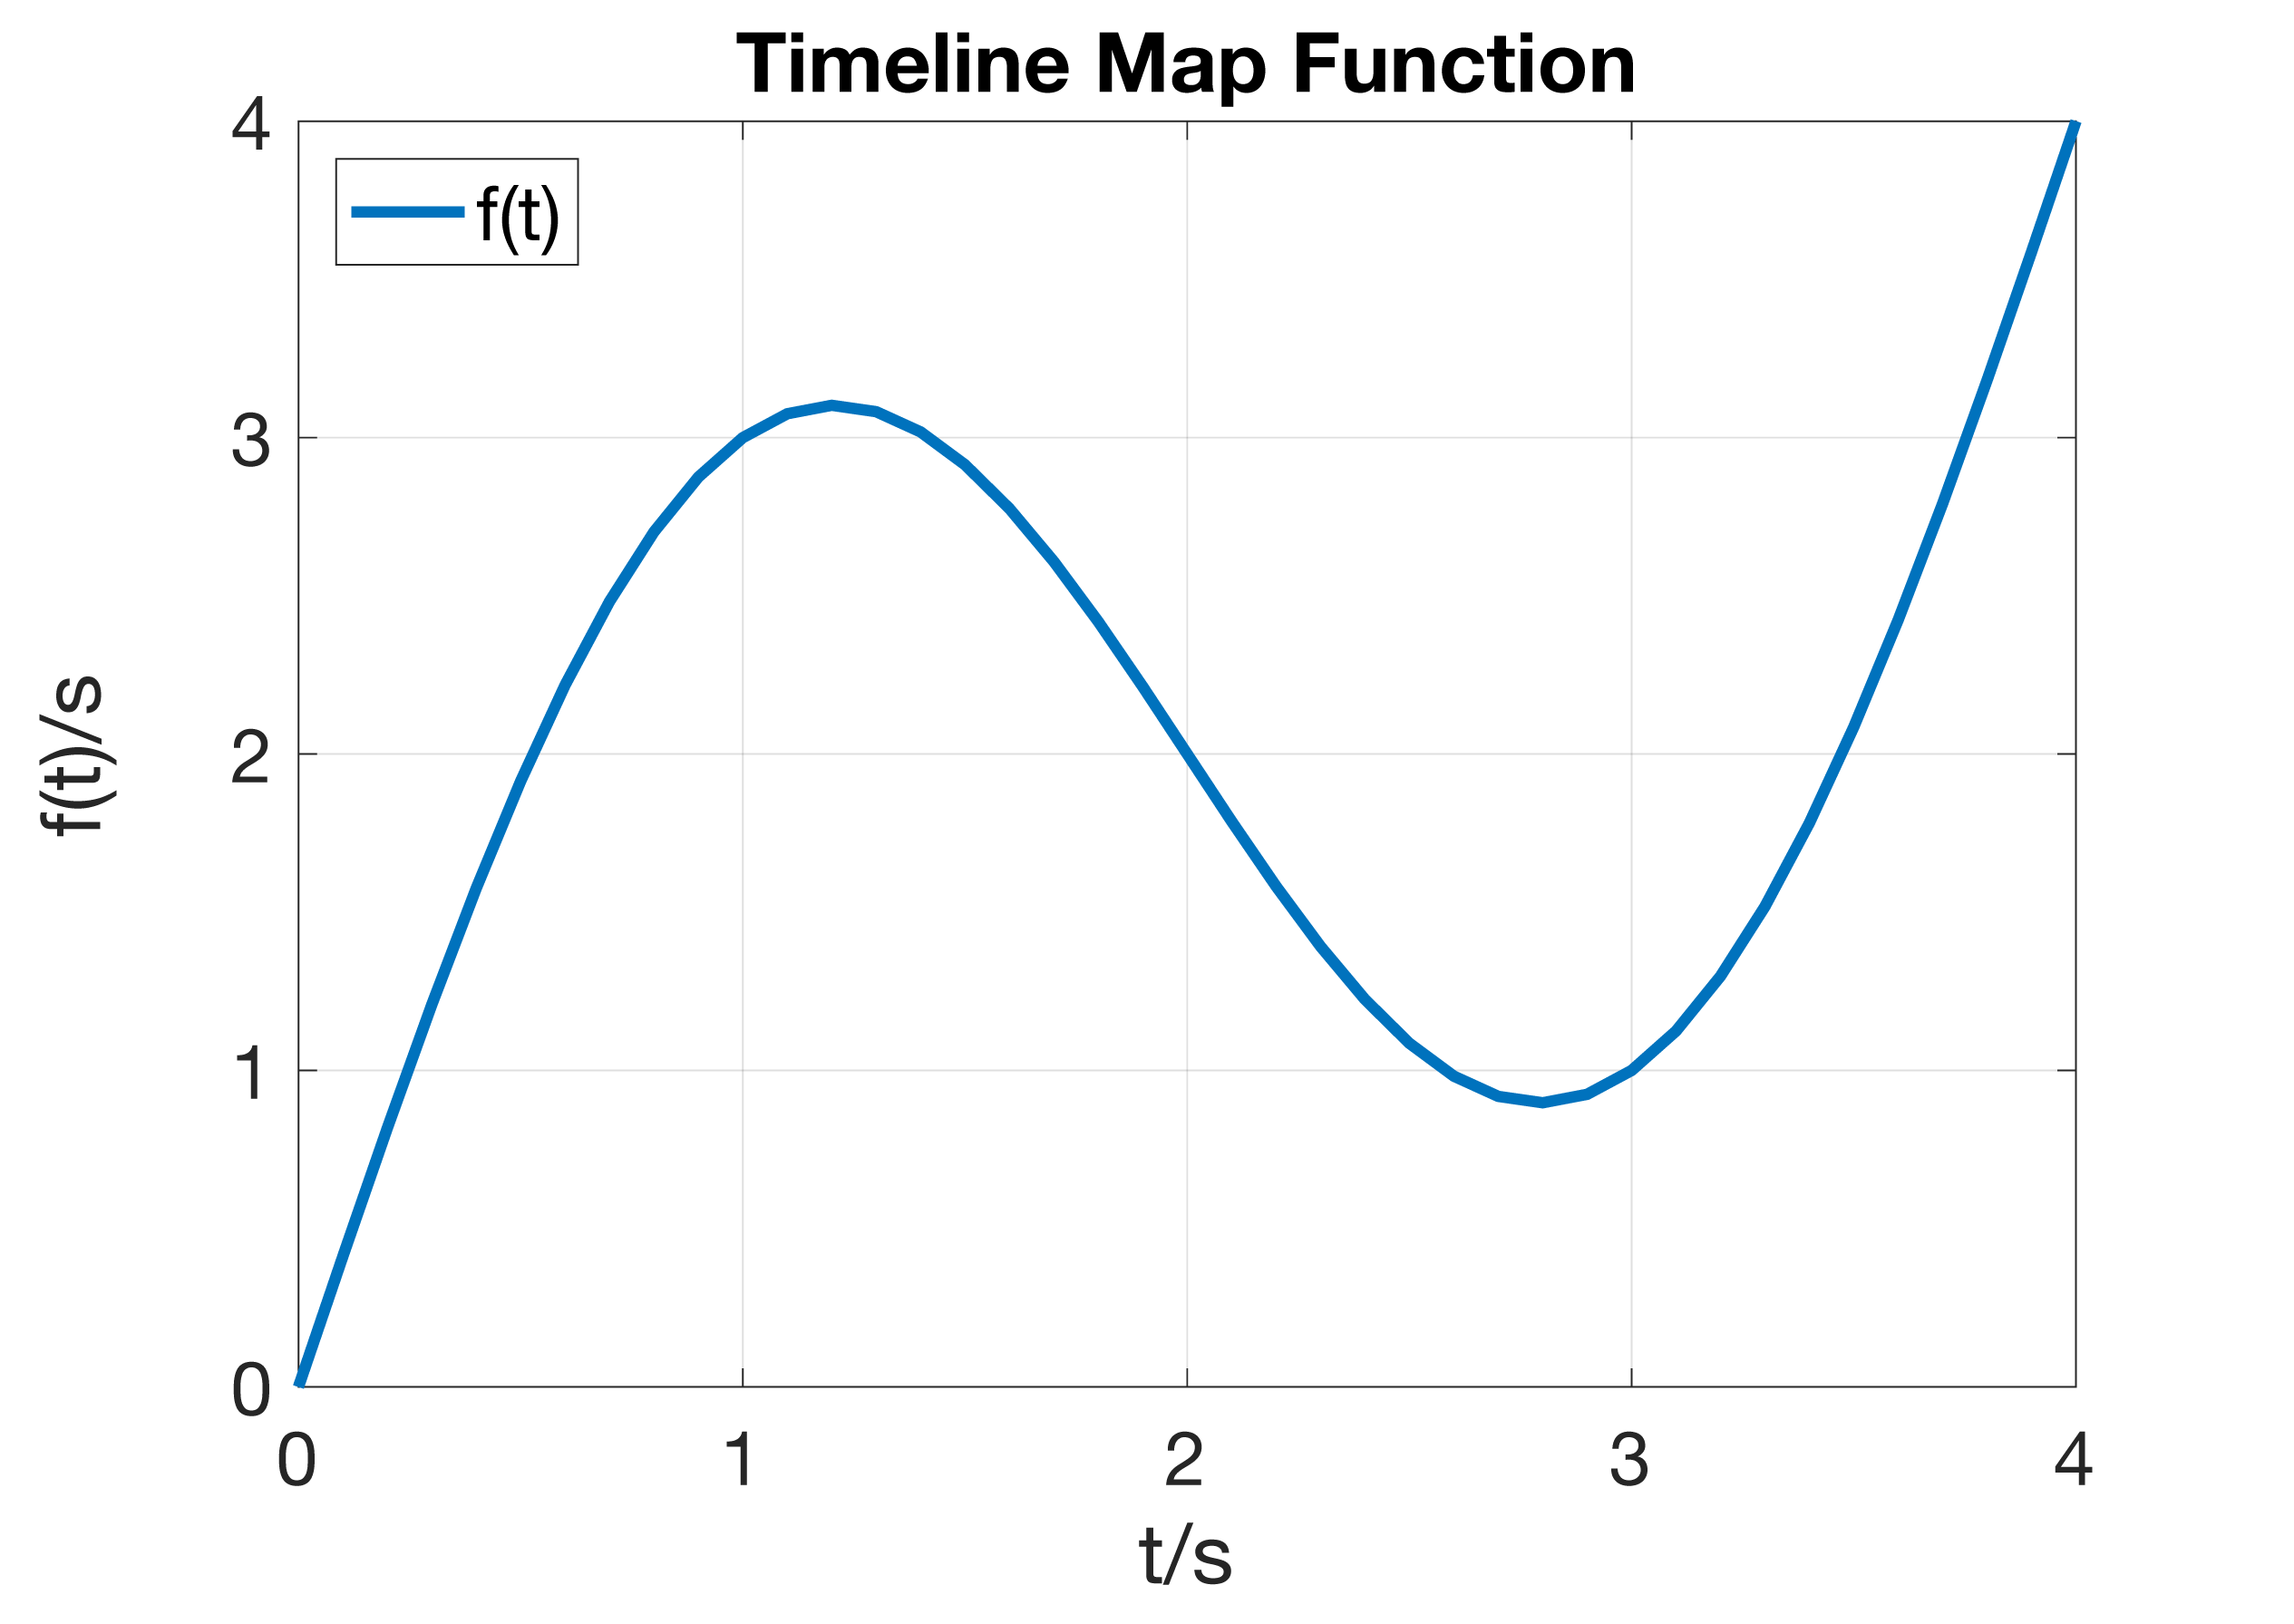

To implement this effect, we first define our map function $f(t).$

In [25]:
# define map function
from math import sin, pi

time_line_map = lambda t: t + 2*sin(pi/2*t)
duration = 4
# apply the map
sinusoidal = video.fl_time(time_line_map)
# set duration of new video
sinusoidal = sinusoidal.set_duration(duration)

# write result to file
sinusoidal.write_videofile('toy_plane_sin.mp4')

Moviepy - Building video toy_plane_sin.mp4.
Moviepy - Writing video toy_plane_sin.mp4

Moviepy - Done !
Moviepy - video ready toy_plane_sin.mp4


## Customize Images
We can customize images, either. This example makes the video blink once every 2
seconds. First, we define our own image process function. In this function, we multiply each frame by a scale factor $s(t).$

$s(t) = 1 + sin(\pi t)$

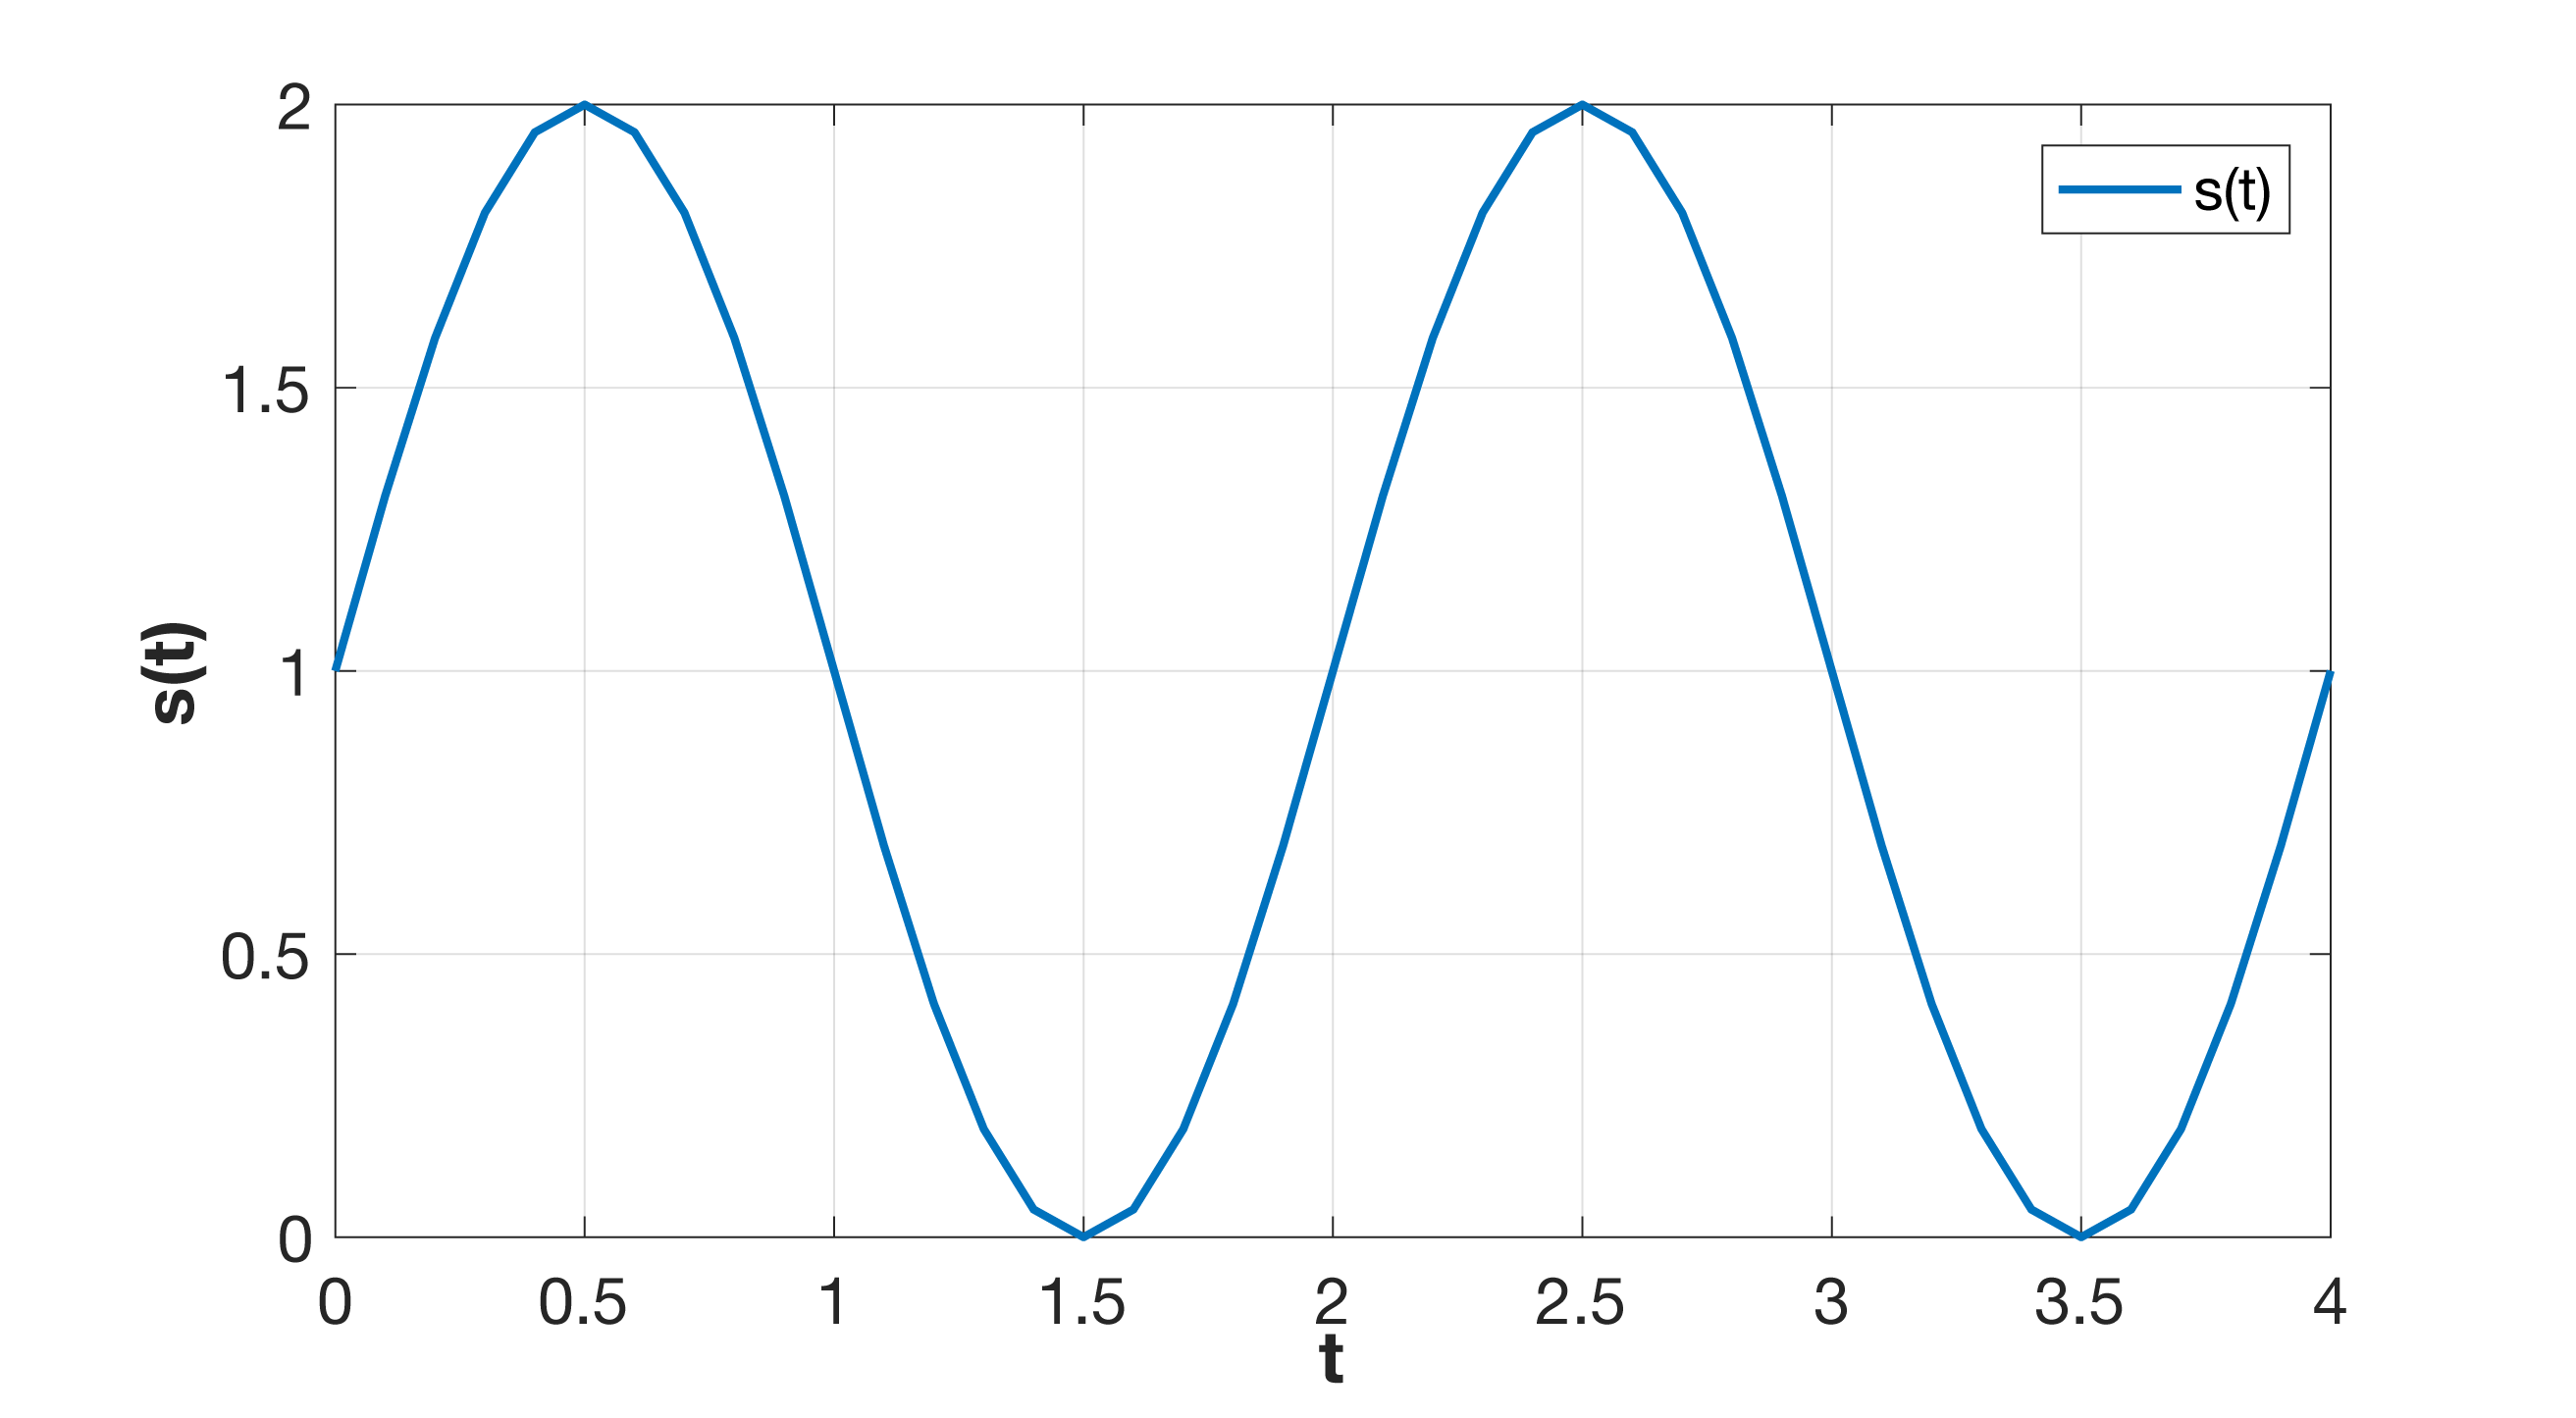

In [26]:
# define process function
import numpy as np
def blink(get_frame, t):
  # frame is numpy array of size (height, width, 3)
  frame = get_frame(t) # get current frame
  # change lightness
  scale = (1+sin(t*pi))
  frame = frame*scale
  frame = frame.astype(np.int8) # convert to int8
  return frame    



Then, apply our process function and save the video.

In [27]:
# apply function `blink`
blinking = video.fl(blink)
# write result to file
blinking.write_videofile('toy_plane_blink.mp4')

Moviepy - Building video toy_plane_blink.mp4.
Moviepy - Writing video toy_plane_blink.mp4

Moviepy - Done !
Moviepy - video ready toy_plane_blink.mp4


# **The End**



---

